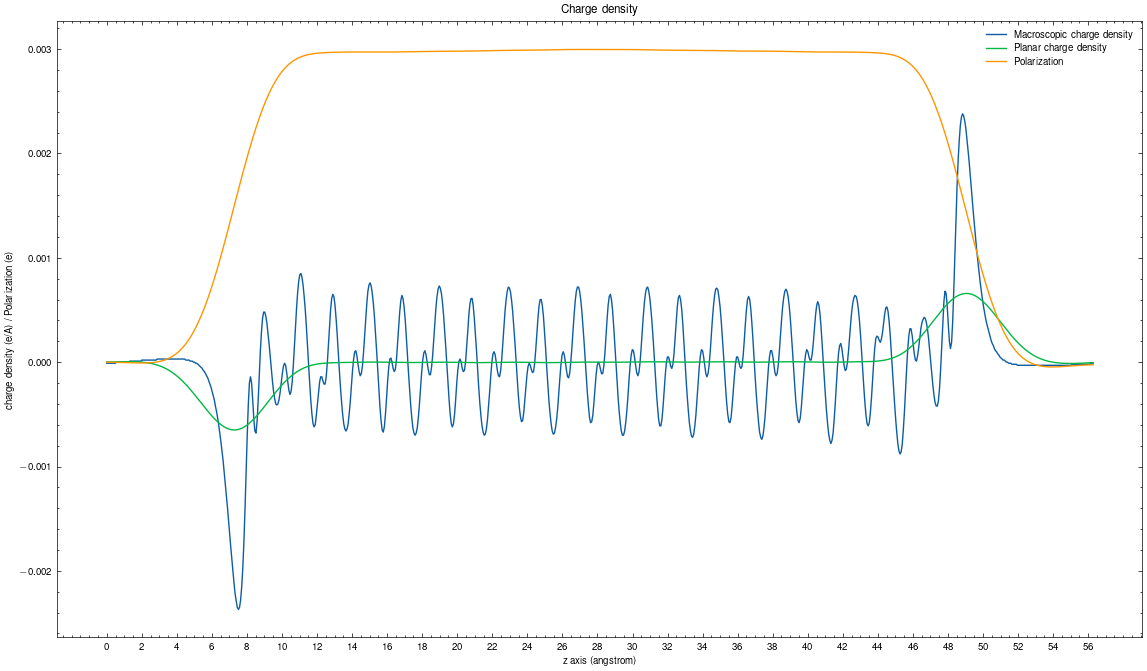

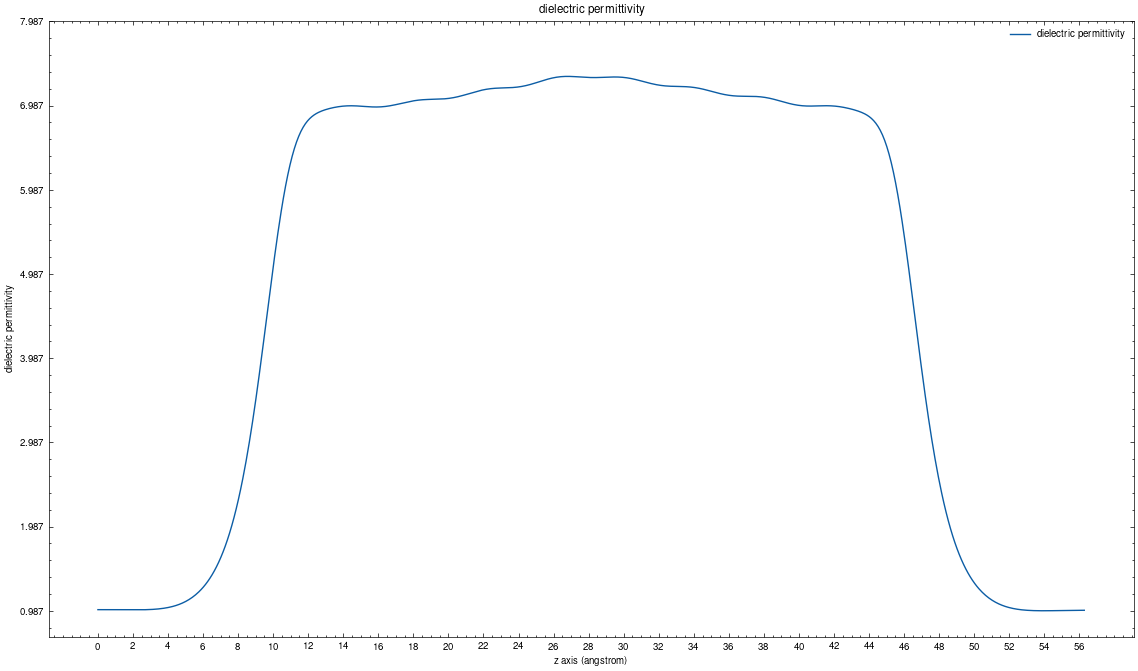

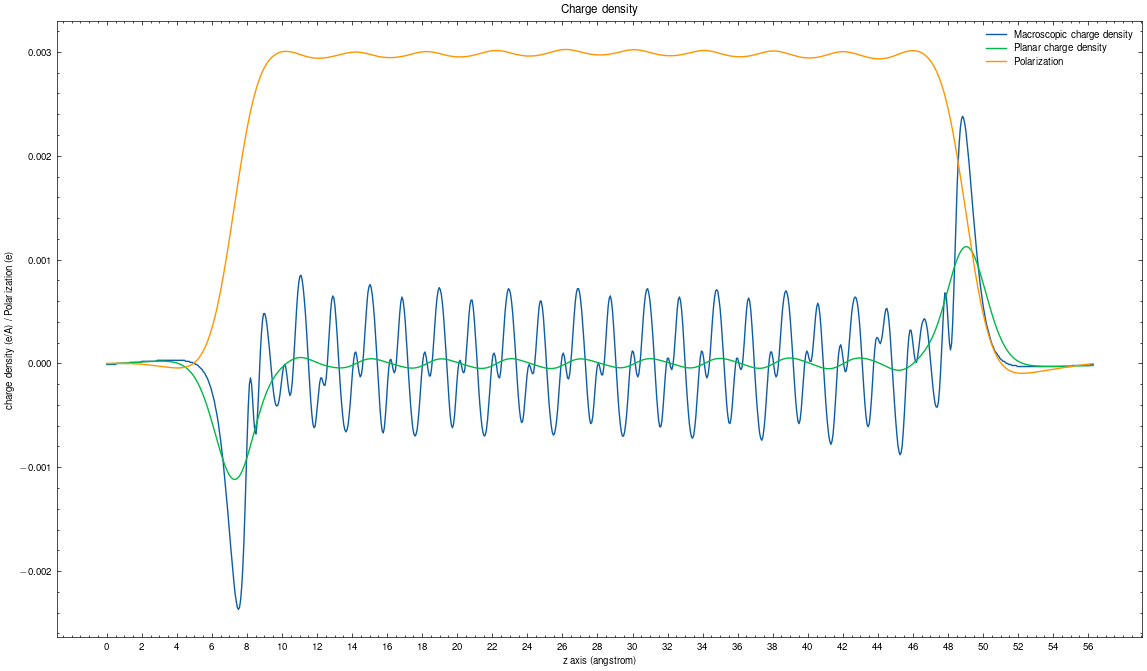

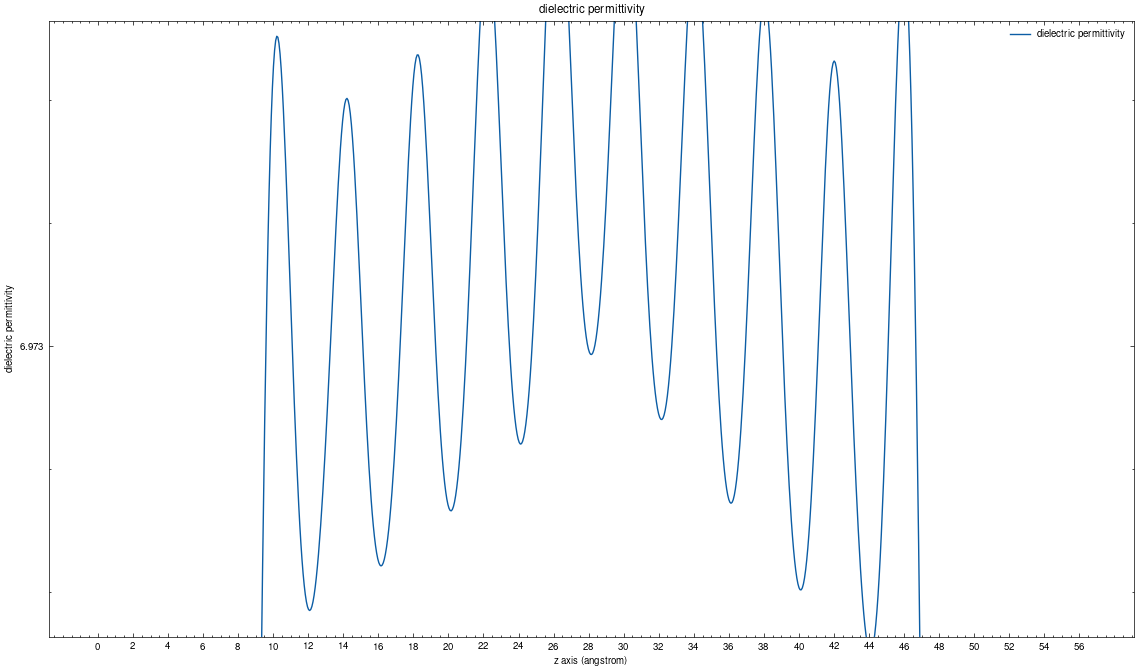

In [81]:
import matplotlib.pyplot as plt
import numpy as np
# import scienceplots
import pymatgen.io.vasp
from scipy.ndimage import gaussian_filter1d


ind_chg_file_path = "../VASP_files/MACROSCOPIC_AVERAGE.dat"
E_ext = 0.02
Planar_area = 3.953265*3.970536

def macro_charge(dat_file_path): # Read MACROSCOPIC_AVERAGE.dat file
    """
    Read the MACROSCOPIC_AVERAGE.dat file and return the data as a numpy array.
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)

def box_filter(induced_chg, sigma, iter):
    """
    Apply box filter to the induced charge density.
    """
    marc_charg = np.zeros((len(induced_chg), 2))
    marc_charg[:,0] = induced_chg[:,0]
    marc_charg[:,1] = induced_chg[:,2]

    sig = int(sigma / (induced_chg[1, 0] - induced_chg[0, 0])) 
    window = np.ones(sig) / sig

    for i in range(iter):
        marc_charg[:,1] = np.convolve(marc_charg[:,1], window, 'same')
        
    return marc_charg

def gaussian_filter(induced_chg, sigma, iter):
    """
    Apply Gaussian filter to the induced charge density.
    """
    # sig = int(sigma / (induced_chg[1, 0] - induced_chg[0, 0])) - 1
    sig = int(sigma / (induced_chg[1, 0] - induced_chg[0, 0])) 
    # sig = int(sigma / (induced_chg[1, 0] - induced_chg[0, 0])) + 1

    marc_charg = np.zeros((len(induced_chg), 2))
    marc_charg[:,0] = induced_chg[:,0]
    marc_charg[:,1] = induced_chg[:,2]
    for i in range(iter):
        marc_charg[:,1] = gaussian_filter1d(marc_charg[:,1], sig)
        
    return marc_charg

def polarization(array_data):
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
        
    return polar

def permittivity(list_data):
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    permitt = (2*E_ext)/(2*E_ext - (np.array(list_data)/(Planar_area)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    
    return permitt

# induced_polarization = polarization(induced_charge)
# induced_permittivity = permittivity(induced_polarization)

induced_charge = macro_charge(ind_chg_file_path)

box_ind_chg = box_filter(induced_charge, sigma=1.95, iter=10)
box_induced_polarization = polarization(box_ind_chg)
box_induced_permittivity = permittivity(box_induced_polarization)

gau_ind_chg = gaussian_filter(induced_charge, sigma=1, iter=1)
gau_induced_polarization = polarization(gau_ind_chg)
gau_induced_permittivity = permittivity(gau_induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], box_ind_chg[:, 1], label='Planar charge density')
plt.plot(induced_charge[:, 0], box_induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], box_induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(box_induced_permittivity), max(box_induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], gau_ind_chg[:, 1], label='Planar charge density')
plt.plot(induced_charge[:, 0], gau_induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], gau_induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(gau_induced_permittivity), max(gau_induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.ylim(6.5, 7.5)
plt.legend()
plt.show()

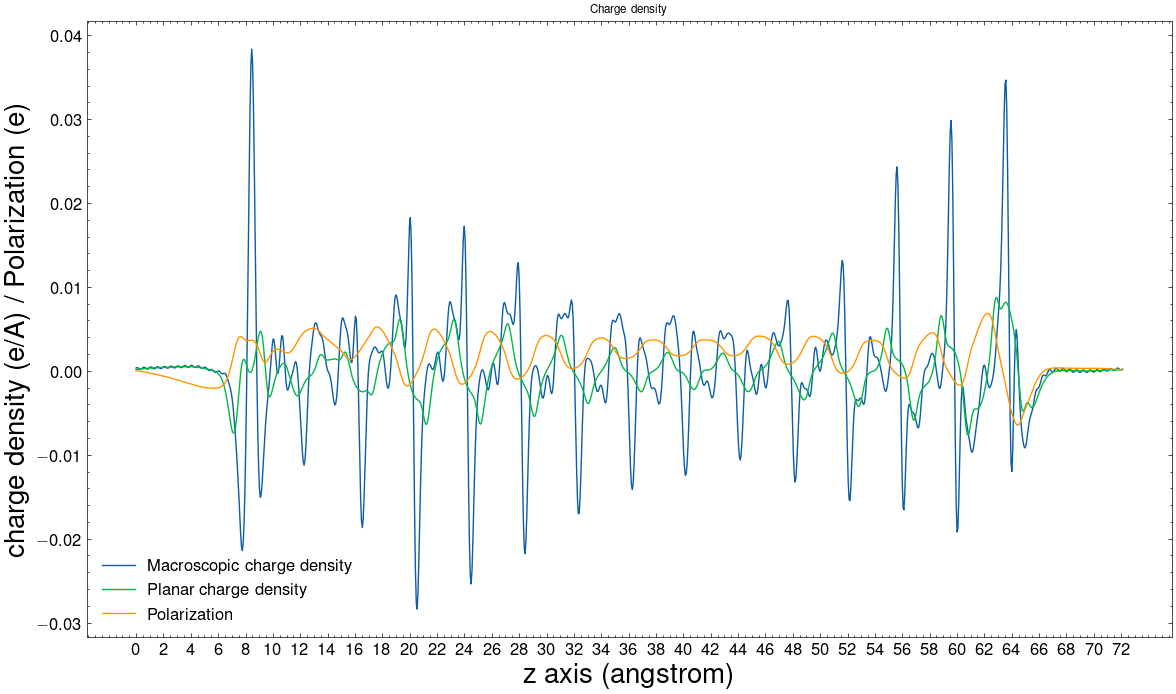

Locator attempting to generate 34262 ticks ([-923.951939988397, ..., 5928.248060011213]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 34262 ticks ([-923.951939988397, ..., 5928.248060011213]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 34262 ticks ([-923.951939988397, ..., 5928.248060011213]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 34262 ticks ([-923.951939988397, ..., 5928.248060011213]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 34262 ticks ([-923.951939988397, ..., 5928.248060011213]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 34262 ticks ([-923.951939988397, ..., 5928.248060011213]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 34262 ticks ([-923.951939988397, ..., 5928.248060011213]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 34262 ticks ([-923.951939988397, ..., 5928.248060011213]), which e

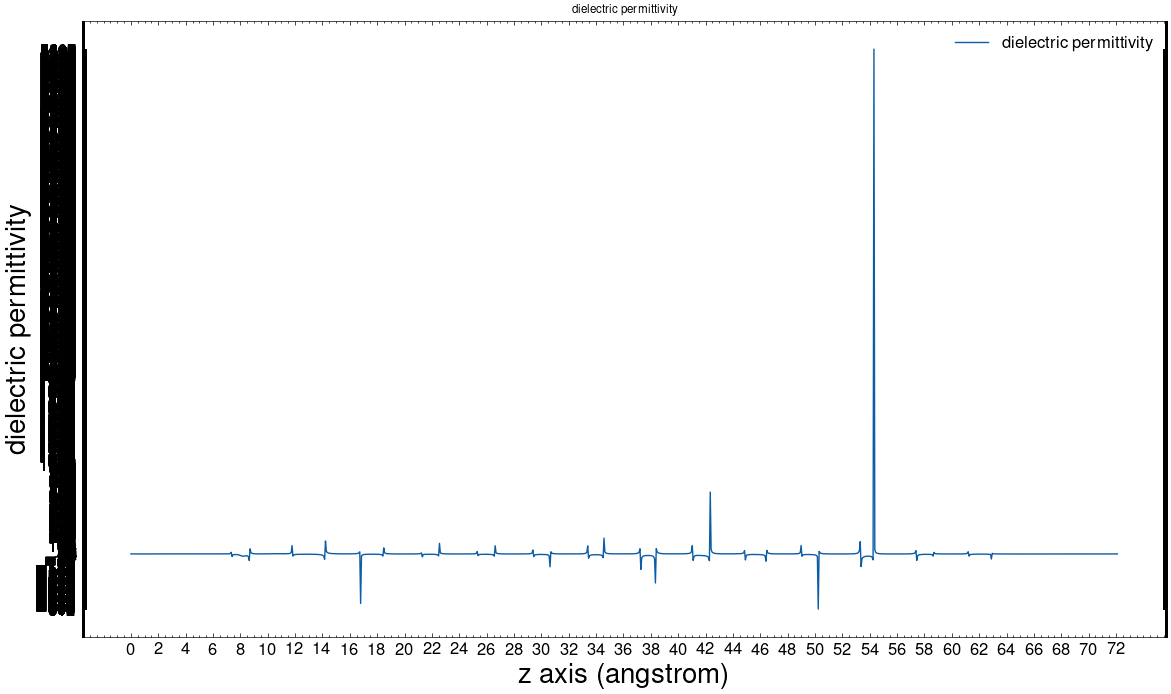

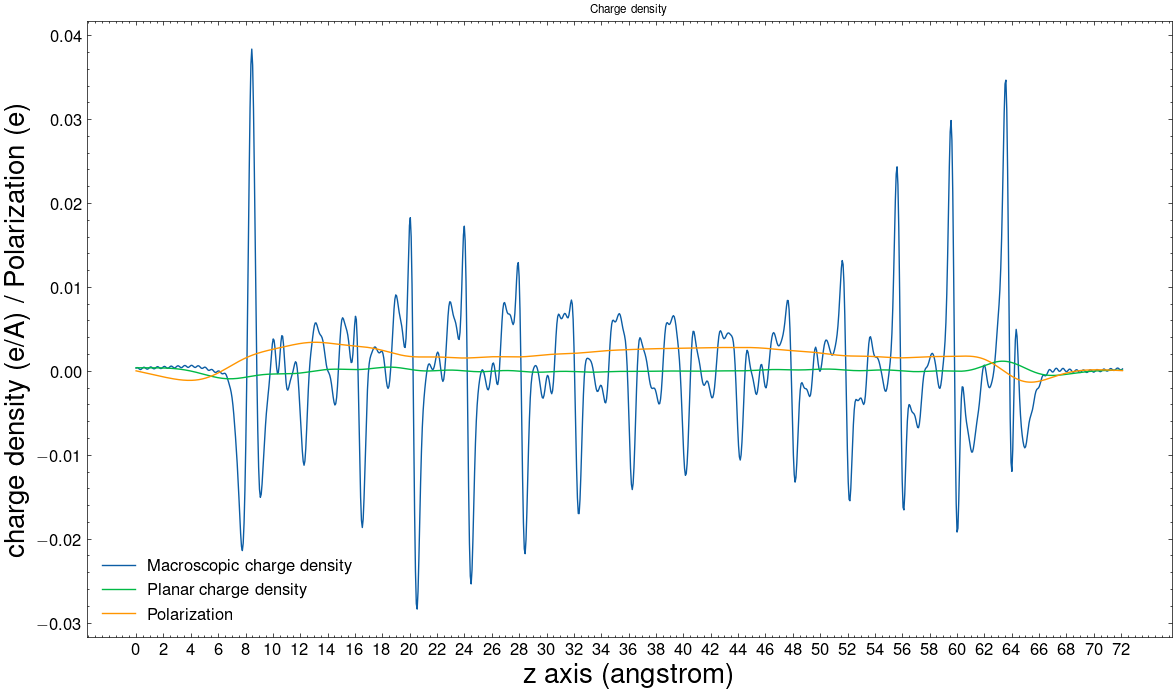

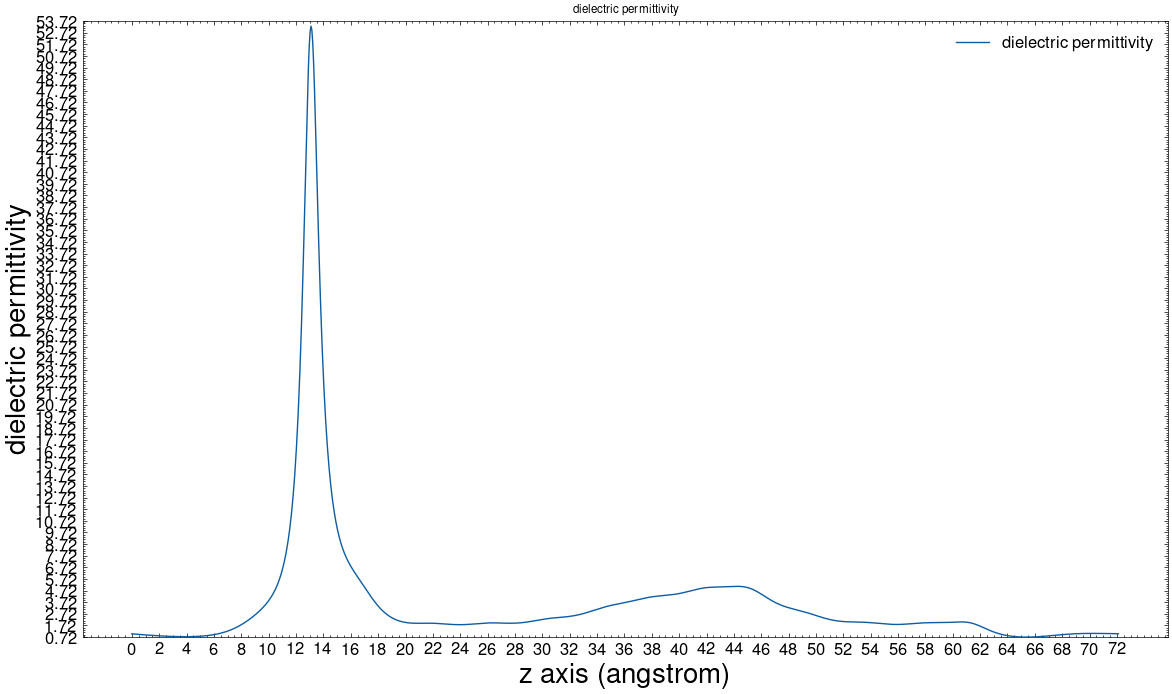

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import pymatgen.io.vasp
from scipy.ndimage import gaussian_filter1d
plt.style.use(['science','nature'])

###!
ind_chg_file_path = "../VASP_files/6_0.02_1E-5.dat"
E_ext = 0.02
###!
Planar_area = 3.953265*3.970536



def macro_charge(dat_file_path): # Read MACROSCOPIC_AVERAGE.dat file
    """
    Read the MACROSCOPIC_AVERAGE.dat file and return the data as a numpy array.
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)

def box_filter(induced_chg, sigma, iter):
    """
    Apply box filter to the induced charge density.
    """
    marc_charg = np.zeros((len(induced_chg), 2))
    marc_charg[:,0] = induced_chg[:,0]
    marc_charg[:,1] = induced_chg[:,2]

    sig = int(sigma / (induced_chg[1, 0] - induced_chg[0, 0])) 
    window = np.ones(sig) / sig

    for i in range(iter):
        marc_charg[:,1] = np.convolve(marc_charg[:,1], window, 'same')
        
    return marc_charg

def gaussian_filter(induced_chg, sigma, iter):
    """
    Apply Gaussian filter to the induced charge density.
    """
    # sig = int(sigma / (induced_chg[1, 0] - induced_chg[0, 0])) - 1
    sig = int(sigma / (induced_chg[1, 0] - induced_chg[0, 0])) 
    # sig = int(sigma / (induced_chg[1, 0] - induced_chg[0, 0])) + 1

    marc_charg = np.zeros((len(induced_chg), 2))
    marc_charg[:,0] = induced_chg[:,0]
    marc_charg[:,1] = induced_chg[:,2]
    for i in range(iter):
        marc_charg[:,1] = gaussian_filter1d(marc_charg[:,1], sig)
        
    return marc_charg

def polarization(array_data):
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
        
    return polar

def permittivity(list_data):
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    permitt = (2*E_ext)/(2*E_ext - (np.array(list_data)/(Planar_area)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    
    return permitt

# induced_polarization = polarization(induced_charge)
# induced_permittivity = permittivity(induced_polarization)

induced_charge = macro_charge(ind_chg_file_path)

#! Change the sigma and the number of iteration
box_ind_chg = box_filter(induced_charge, sigma=1.95, iter=1)
box_induced_polarization = polarization(box_ind_chg)
box_induced_permittivity = permittivity(box_induced_polarization)

gau_ind_chg = gaussian_filter(induced_charge, sigma=2, iter=1)
gau_induced_polarization = polarization(gau_ind_chg)
gau_induced_permittivity = permittivity(gau_induced_polarization)
###########!

# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], box_ind_chg[:, 1], label='Planar charge density')
plt.plot(induced_charge[:, 0], box_induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel(r'y coordinate (\AA)', fontsize=20)
plt.ylabel(r'charge density (e/\AA)'+'/ Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend(fontsize=12)
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], box_induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(box_induced_permittivity), max(box_induced_permittivity)+1, 1.0))  # Add yticks
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
plt.xlabel(r'x coordinate (\AA)', fontsize=20)
plt.ylabel('Dielectric permittivity', fontsize=20)
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend(fontsize=12)
plt.show()


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], gau_ind_chg[:, 1], label='Planar charge density')
plt.plot(induced_charge[:, 0], gau_induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel(r'y coordinate (\AA)', fontsize=20)
plt.ylabel(r'charge density (e/\AA)'+'/ Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend(fontsize=12)
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], gau_induced_permittivity, label='dielectric permittivity')
plt.ylim(6.5, 7.5)
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(gau_induced_permittivity), max(gau_induced_permittivity)+1, 1.0))  # Add yticks
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
plt.xlabel(r'x coordinate (\AA)', fontsize=20)
plt.ylabel('Dielectric permittivity', fontsize=20)
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend(fontsize=12)
plt.show()